In [32]:
from HopfieldNet import ClassicHopfield, DiscreteHopfield, ContinuousHopfield

In [33]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

In [34]:
IMG_SHAPE = (128, 128)
IMG_DIR = "imgs/discrete"

In [35]:
def load_images_from_folder(folder_path, discrete=True):
    images = []
    for filename in os.listdir(folder_path):
        img = Image.open(os.path.join(folder_path, filename))
        if img is not None:
            img = img.convert('L')
            img = img.resize(IMG_SHAPE)
            img = np.array(img) / 255.0
            img = img.flatten()
            if discrete:
                img = np.where(img > 0.5, 1, -1)
            images.append(img.flatten())
    return images

In [36]:
def save_images(images, folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    for i, img in enumerate(images):
        img = img.reshape(IMG_SHAPE)
        img = (img + 1) / 2 * 255
        img = Image.fromarray(img.astype(np.uint8))
        img.save(os.path.join(folder_path, f"{i + 1}.png"))

In [37]:
def plot_images(images, n_cols=6):
    n_rows = int(np.ceil(len(images) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i].reshape(IMG_SHAPE), cmap='gray')
            ax.axis('off')
        else:
            ax.axis('off')
    plt.tight_layout()
    plt.show()

In [38]:
def blacken_half_image(image):
    half = image.shape[0] // 2
    image[half:] = -1
    return image

def grayen_half_image(image):
    half = image.shape[0] // 2
    image[half:] = 0
    return image

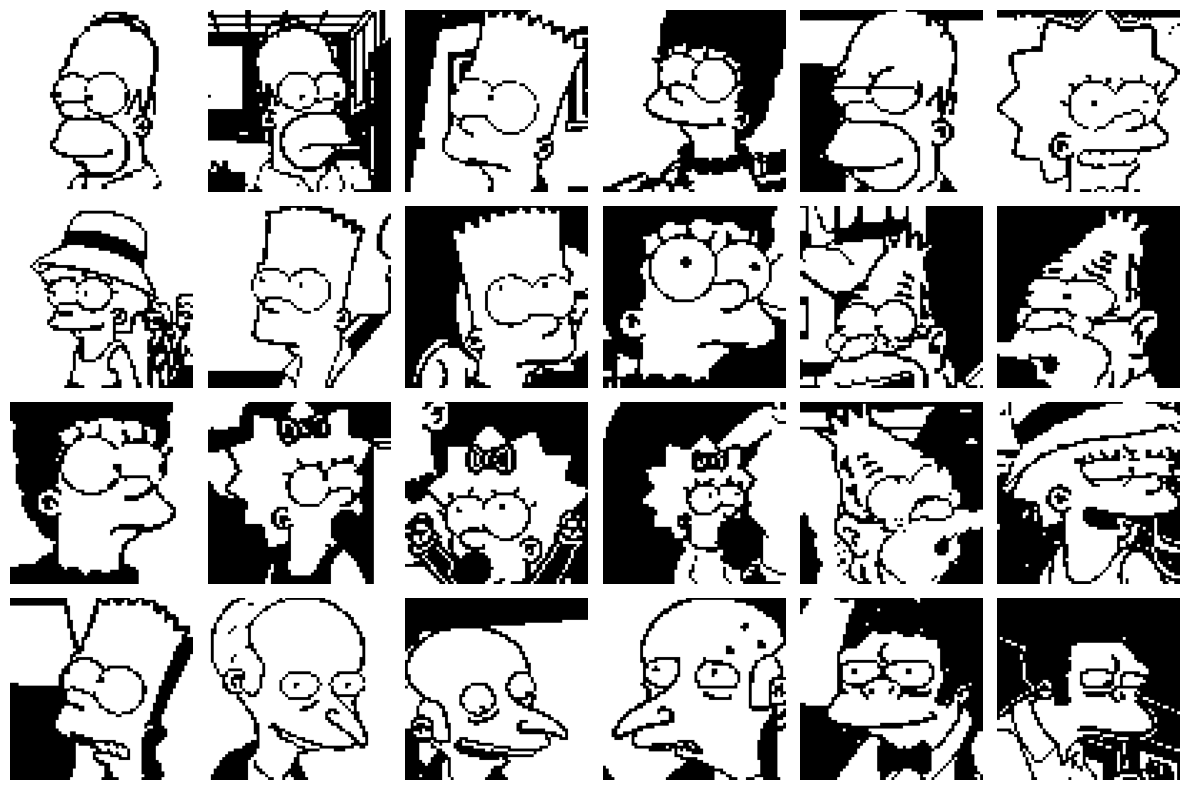

In [39]:
images = load_images_from_folder(IMG_DIR)
plot_images(images)

# save_images(images, "imgs")

In [40]:
hopefield_network = ClassicHopfield()
hopefield_network.store_patterns(np.array(images))

modern_hopefield_network = DiscreteHopfield(beta=2.0)
modern_hopefield_network.store_patterns(np.array(images))

Modified image (half blackened):


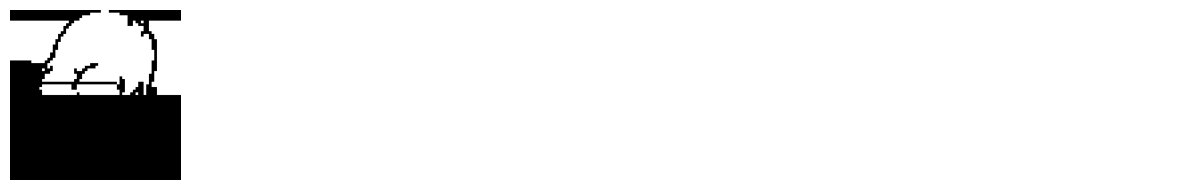

In [41]:
modified_images = blacken_half_image(images[4].copy())
print("Modified image (half blackened):")
plot_images([modified_images.reshape(IMG_SHAPE)])

Iteration #1: Energy=-304828784.0000 (Delta E = -242854096.0000), State=[-1 -1  1 ... -1  1  1]
Iteration #2: Energy=-467845872.0000 (Delta E = -163017088.0000), State=[-1 -1 -1 ... -1 -1 -1]
Iteration #3: Energy=-486524672.0000 (Delta E = -18678800.0000), State=[-1 -1 -1 ... -1 -1 -1]
Iteration #4: Energy=-487512288.0000 (Delta E = -987616.0000), State=[-1 -1 -1 ... -1 -1 -1]
Iteration #5: Energy=-487570688.0000 (Delta E = -58400.0000), State=[-1 -1 -1 ... -1 -1 -1]
Iteration #6: Energy=-487576992.0000 (Delta E = -6304.0000), State=[-1 -1 -1 ... -1 -1 -1]
Iteration #7: Energy=-487576992.0000 (Delta E = 0.0000), State=[-1 -1 -1 ... -1 -1 -1]
Recovered image:


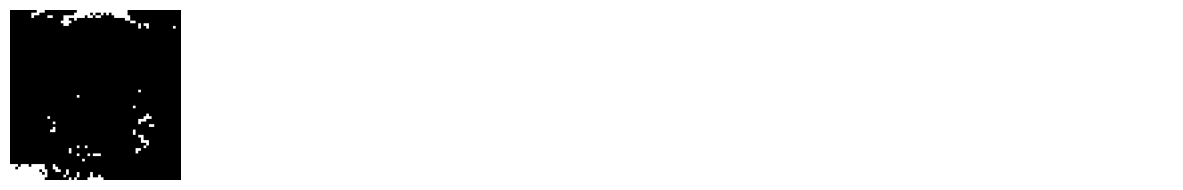

In [42]:
recovered_image, state_history, energy_history = hopefield_network.retrieve(modified_images.copy(), mode="async", max_iter=1000)

print("Recovered image:")
plot_images([recovered_image.reshape(IMG_SHAPE)])

d:\.projects\hopfield\HopfieldNet\ModernHopfield.py:40: RuntimeWarning: overflow encountered in exp
  energy = -np.exp(log_sum_exp_val)


Iteration 1: State=[-1 -1 -1 ...  1  1  1]
Iteration 2: State=[-1 -1 -1 ...  1  1  1]
Recovered image:


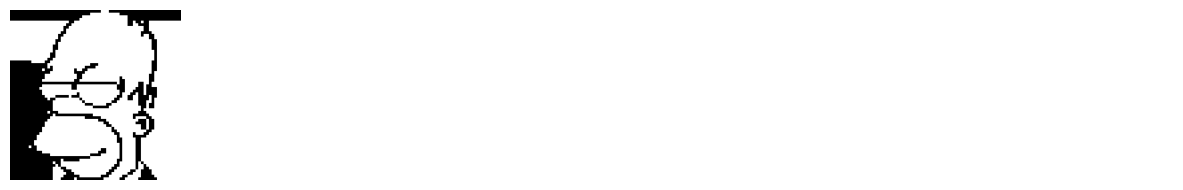

In [43]:
retrieved_image = modern_hopefield_network.retrieve(modified_images.copy(), max_iter=2)

print("Recovered image:")
plot_images([retrieved_image.reshape(IMG_SHAPE)])

In [44]:
images = load_images_from_folder('imgs/continuous', discrete=False)

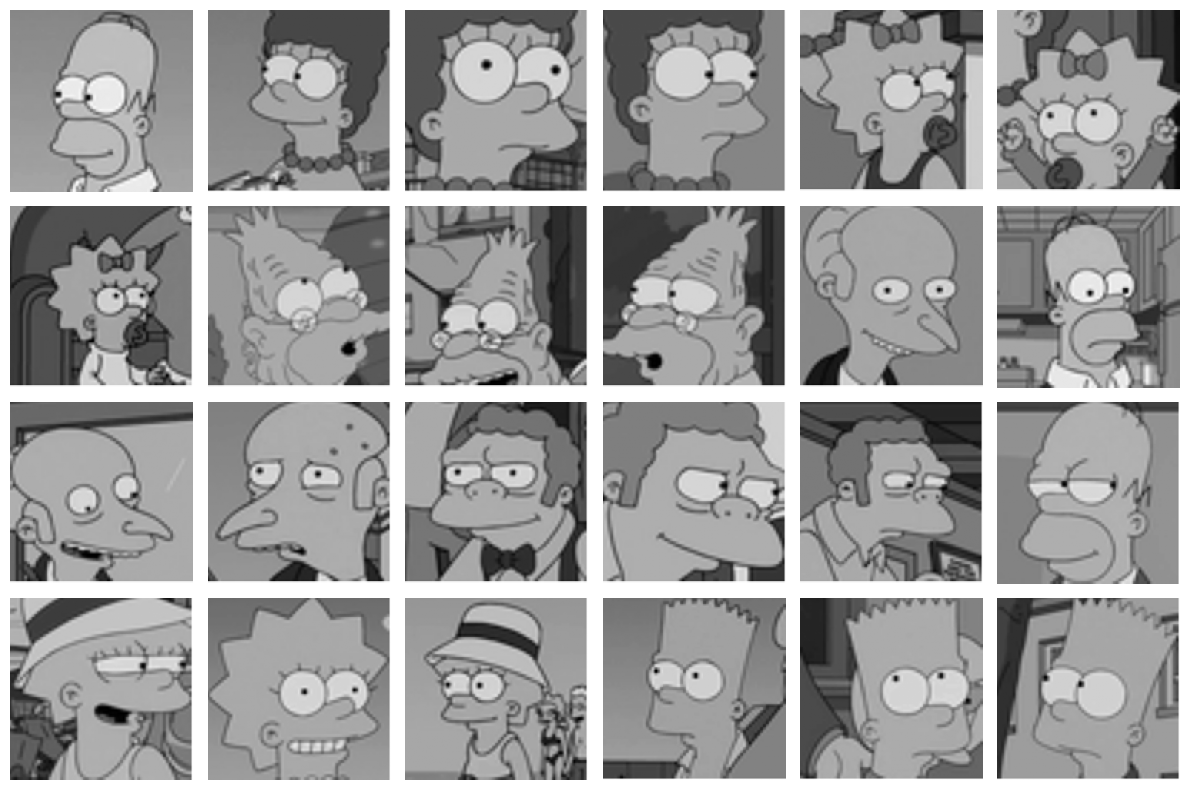

In [69]:
continuous_hopefield_network = ContinuousHopfield(beta=90)
continuous_hopefield_network.store_patterns(np.array(images))

plot_images(continuous_hopefield_network.patterns, n_cols=6)

Modified image (half grayened):


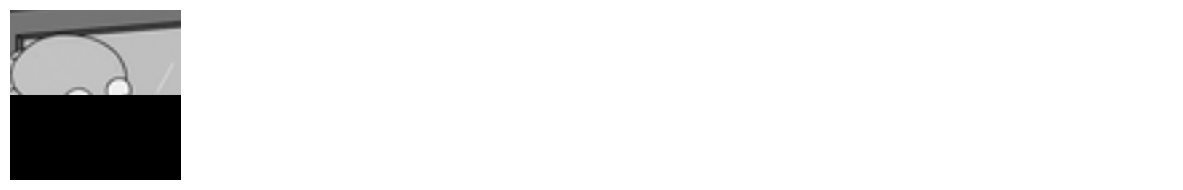

modified_images [0.22745098 0.22745098 0.24313725 ... 0.         0.         0.        ]


In [76]:
modified_images = grayen_half_image(images[np.random.randint(0, len(images))].copy())
print("Modified image (half grayened):")
plot_images([modified_images.reshape(IMG_SHAPE)])

print("modified_images", modified_images)

[0.56862745 0.56862745 0.56862745 ... 1.         1.         1.        ]
Recovered image:


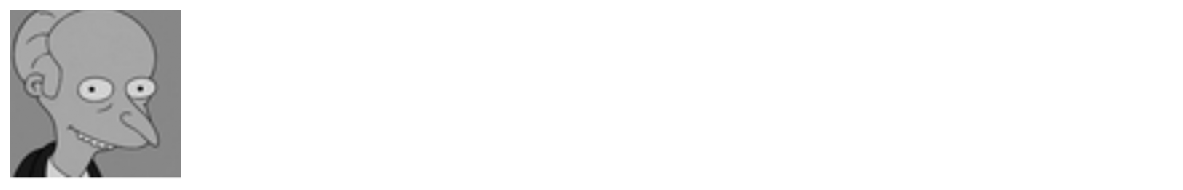

In [78]:
retrieved_image = continuous_hopefield_network.retrieve(modified_images)
print("Recovered image:")
plot_images([retrieved_image.reshape(IMG_SHAPE)])

In [48]:
from scipy.special import softmax

print(softmax(np.array([1, 2, 3]).T, axis=0))

[0.09003057 0.24472847 0.66524096]


In [49]:
def ssoftmax(x: np.ndarray) -> np.ndarray:
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x / np.sum(e_x, axis=-1, keepdims=True)

print(ssoftmax(np.array([1, 2, 3]).T))

[0.09003057 0.24472847 0.66524096]


In [50]:
continuous_hopefield_network.patterns

array([[0.48627451, 0.48627451, 0.48627451, ..., 0.59215686, 0.59215686,
        0.59215686],
       [0.50588235, 0.50196078, 0.50196078, ..., 0.97647059, 0.97647059,
        1.        ],
       [0.31764706, 0.31764706, 0.31764706, ..., 0.96862745, 0.96862745,
        1.        ],
       ...,
       [0.51372549, 0.51372549, 0.51372549, ..., 0.97647059, 0.97647059,
        0.97647059],
       [0.18431373, 0.18431373, 0.18431373, ..., 0.96862745, 0.96862745,
        0.96862745],
       [0.30588235, 0.30980392, 0.30980392, ..., 0.96470588, 0.96470588,
        1.        ]], shape=(24, 16384))